In [1]:
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

读取数据

In [2]:
points = list()
with open('./Hough_Points.txt') as file:
    for line in file:
        points.append([float(x) for x in line.strip().split(',')])
points = np.array(points)   

数据预览

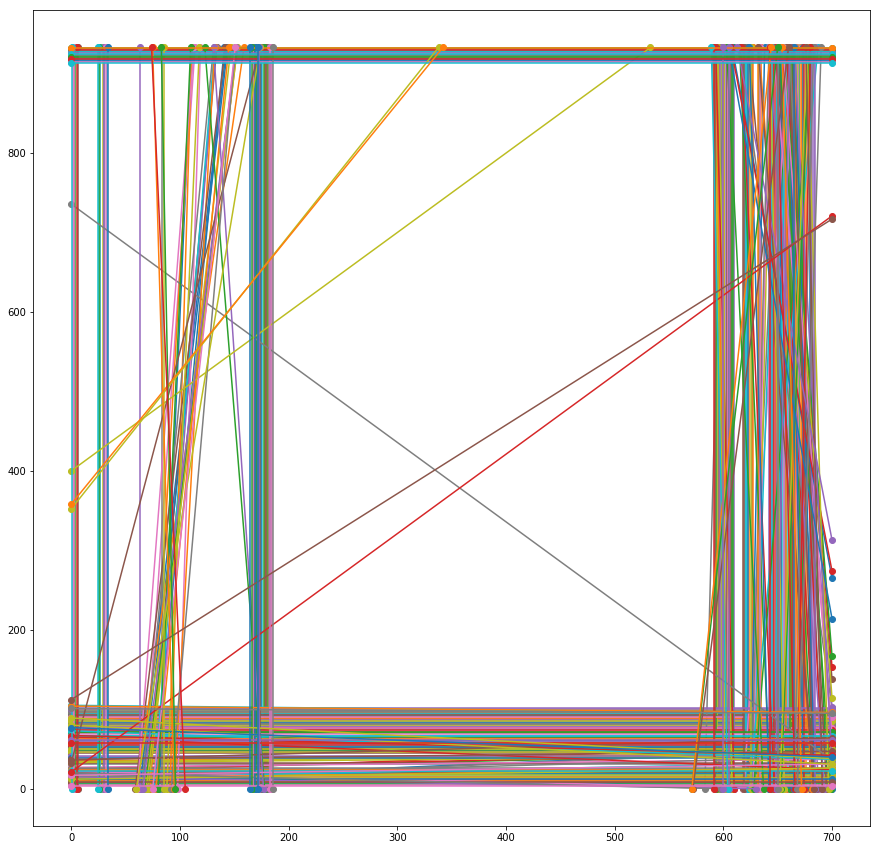

In [3]:
fig = plt.figure(figsize=(15,15))
for x in points:
    plt.plot(x[[0,2]],x[[1,3]],'o-')

数据格式转换

In [4]:
len(points)

374

In [5]:
X = np.zeros((2*len(points),2))
X[:len(points)] = points[:,:2]
X[len(points):] = points[:,2:]

(核心)根据候选聚类数目,逐一聚类.
下面可以看平均耗时.

In [6]:
clusters = range(10,31,2) 
sc_scores = dict()
models = dict()
for k in clusters:
    model = KMeans(n_clusters=k,random_state=0).fit(X)
    sc_score = silhouette_score(X, model.labels_, metric='euclidean')
    sc_scores[k] = sc_score
    models[k] = model

取轮廓系数sc_score最大的聚类数目为最优聚类数

In [7]:
max_sc = max(sc_scores,key=sc_scores.get)
print('最优聚类数目:',max_sc)
labels = models[max_sc].labels_
cluster_centers =  models[max_sc].cluster_centers_

最优聚类数目: 10


In [8]:
mean_points = {k:v for k,v in zip(range(max_sc),cluster_centers)}

将端点标签重整为线段标签,利用set()使其无序化

In [24]:
a = range(10)
b = range(10,20)
for i,x in enumerate(zip(a,b)):
    print(i,x)

0 (0, 10)
1 (1, 11)
2 (2, 12)
3 (3, 13)
4 (4, 14)
5 (5, 15)
6 (6, 16)
7 (7, 17)
8 (8, 18)
9 (9, 19)


In [26]:
line_labels = [str(set(x)) for x in zip(labels[:len(points)],labels[len(points):])]

In [27]:
classed_lines = defaultdict(list)
for i,x in enumerate(zip(labels[:len(points)],labels[len(points):])):
    set_x = set(x)
    if len(set_x) == 2:
        classed_lines[str(set_x)].append(i)
line_set = list(classed_lines.values())

In [32]:
print(line_set)

[[210, 216, 231, 240, 250, 261, 265, 270, 271, 274, 278, 279, 281, 282, 286, 287, 288, 301, 305, 306, 308, 311, 322, 324, 337, 348, 356], [368, 371], [158, 181, 207, 219, 224, 229, 246, 252, 259, 267, 294, 310, 338, 361, 372, 373], [333, 365], [272, 276, 285, 296, 303, 319], [277], [1, 2, 3, 5, 7, 9, 10, 12, 18, 19, 49, 60, 161, 165, 200, 215, 217, 262, 266, 297, 312, 314, 315, 316, 320, 332, 336, 347, 350, 364, 370], [243, 263, 269, 283, 302, 309, 329, 330, 334, 340, 341, 346, 349, 352, 355, 357, 359, 362, 363, 369], [163, 202, 230, 233, 284, 300], [318], [335], [102, 125, 127, 157, 164, 166, 183, 192, 195, 198, 214, 226, 248, 254], [20, 24, 25, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 47, 52, 61, 65, 66, 68, 86, 87, 89, 95, 97, 98, 99, 100, 103, 105, 106, 108, 110, 113, 115, 116, 117, 119, 120, 123, 124, 126, 128, 129, 131, 132, 133, 134, 135, 137, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 159, 162, 167, 168, 170, 171, 172

In [15]:
tmp = set()
merge_lines = defaultdict(list)
for x in zip(labels[:len(points)],labels[len(points):]):
    set_x = set(x)
    if len(set_x) == 2:`
        if str(set_x) in tmp:
            continue
        else:
            tmp.add(str(set_x))
            for i in set_x:
                merge_lines[str(set_x)].extend(mean_points[i])

In [16]:
mean_X = np.array(list(merge_lines.values())).astype(int)

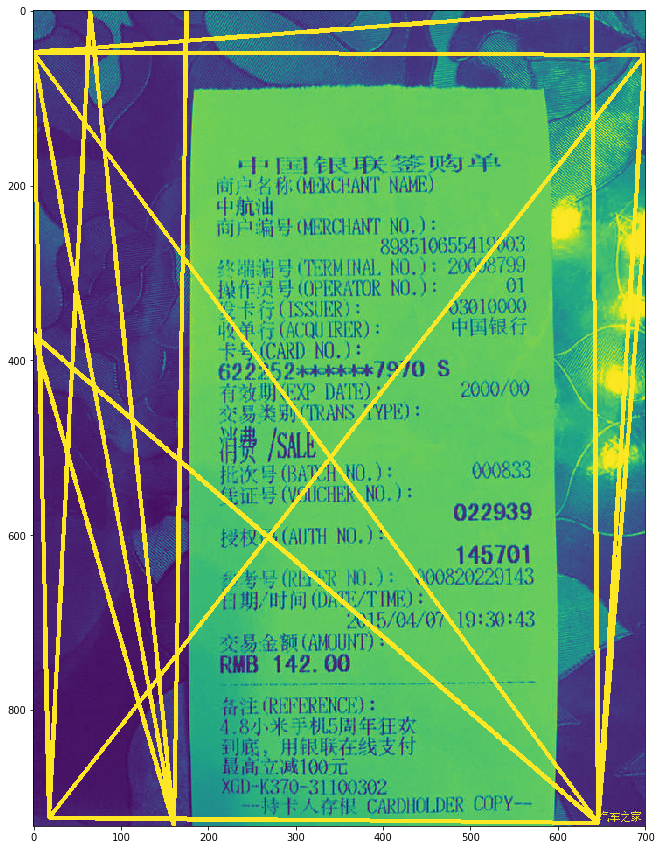

In [17]:
path = './ding/orig.jpeg'
img = cv2.imread(path,0)
for x in mean_X:
    cv2.line(img,tuple(x[:2]),tuple(x[2:]),255,3)
fig = plt.figure(figsize=(15,15))
plt.imshow(img)

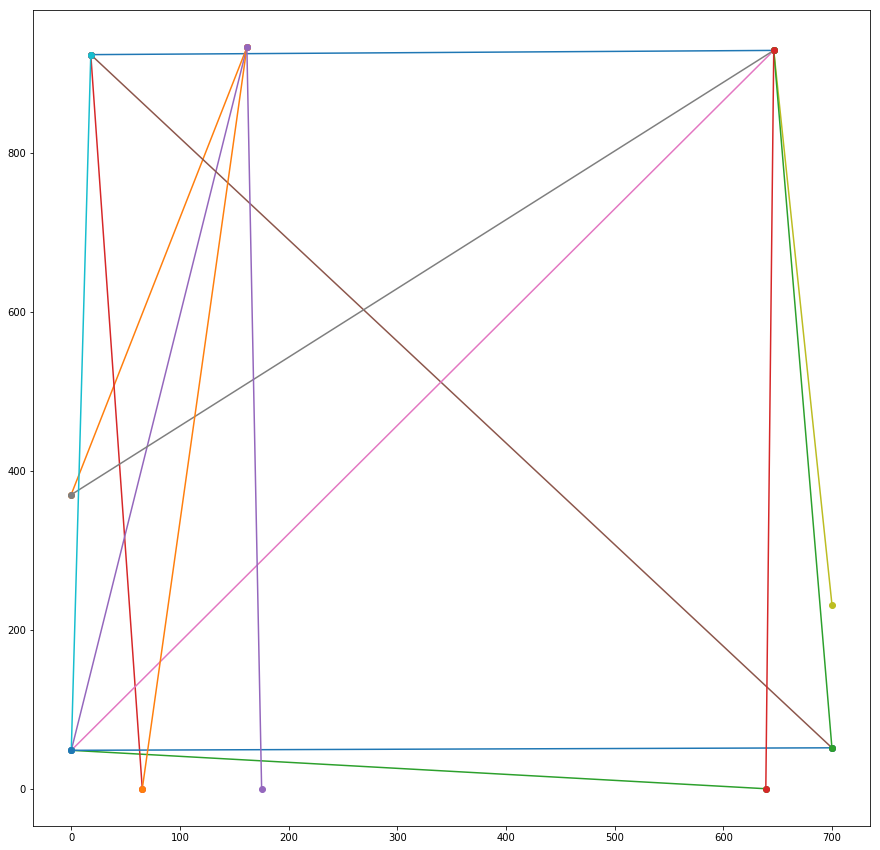

In [56]:
fig = plt.figure(figsize=(15,15))
for x in mean_X:
    plt.plot(x[[0,2]],x[[1,3]],'o-')

对聚类后的线段随机配色

In [19]:
colors = ['r','y','b','m','g','c']
random.shuffle(colors)
color_dict = {label:random.sample(colors,1)[0] for label in set(line_labels)}

整体效果如下:

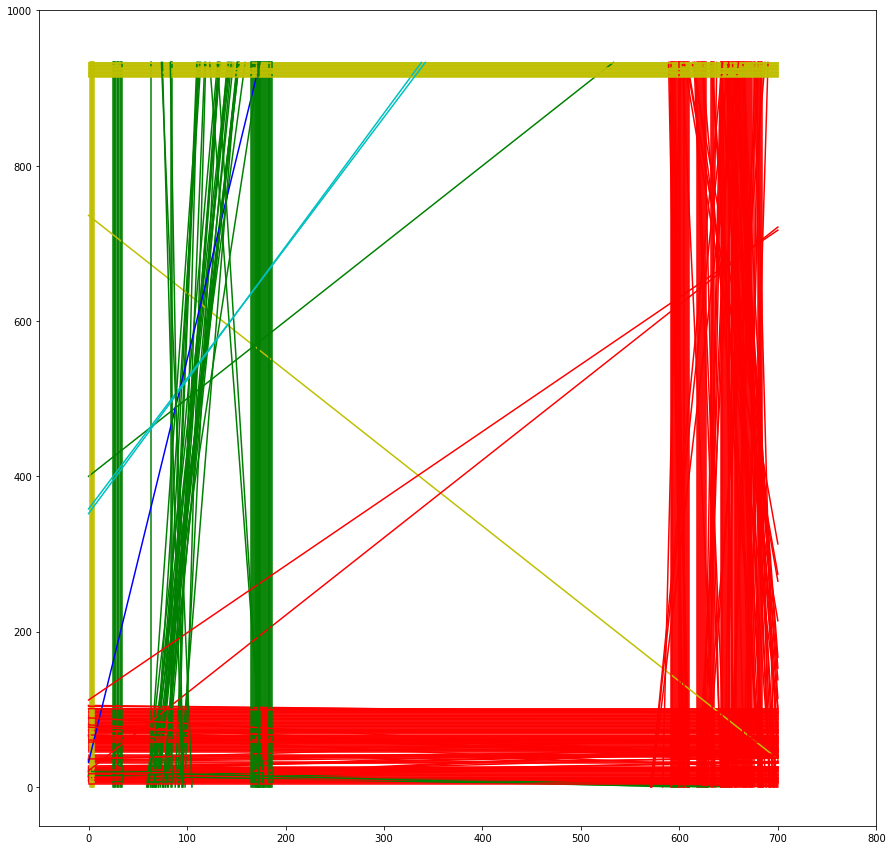

In [20]:
fig = plt.figure(figsize=(15,15))
plt.xlim(-50,800)
plt.ylim(-50,1000)
for i,label in enumerate(line_labels):
    x = points[i]
    plt.plot(x[[0,2]],x[[1,3]],'%s-'%(color_dict[label]))

分类效果如下:

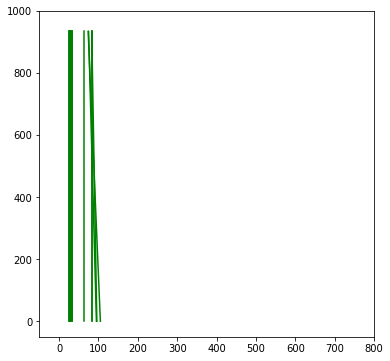

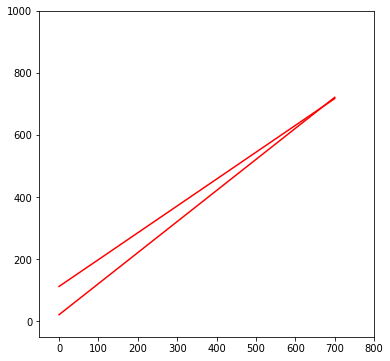

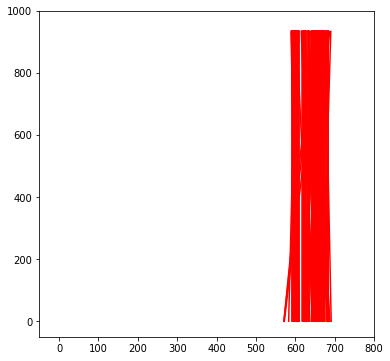

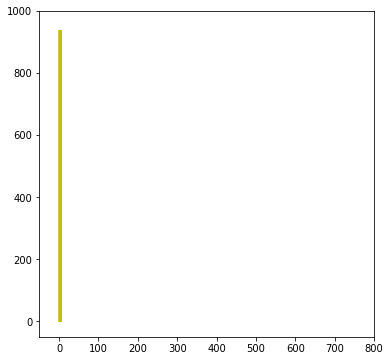

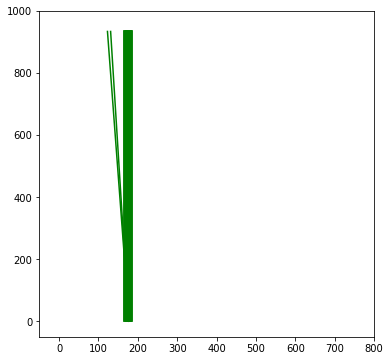

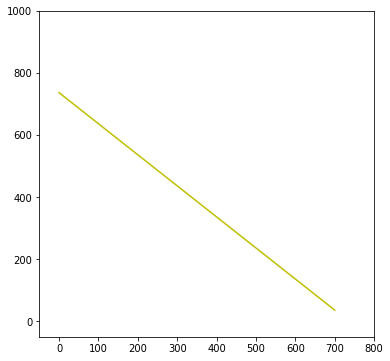

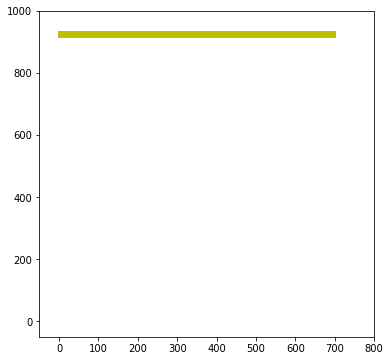

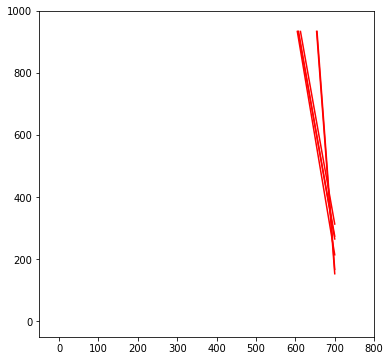

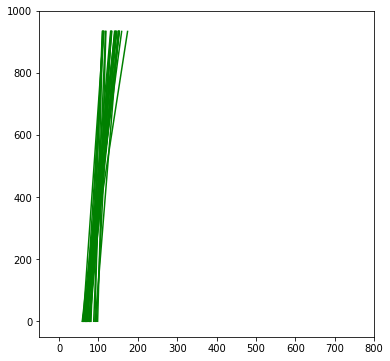

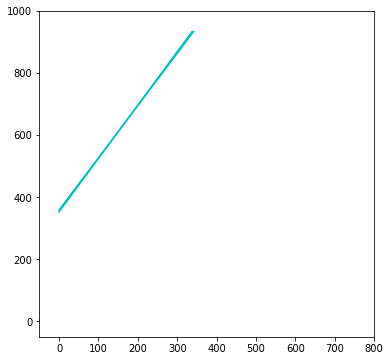

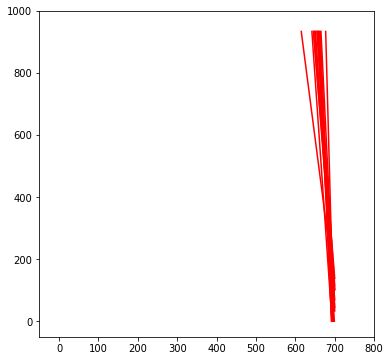

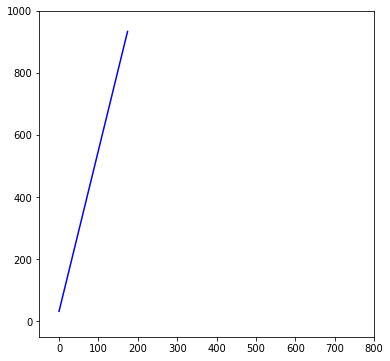

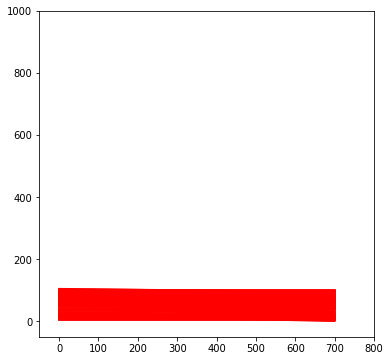

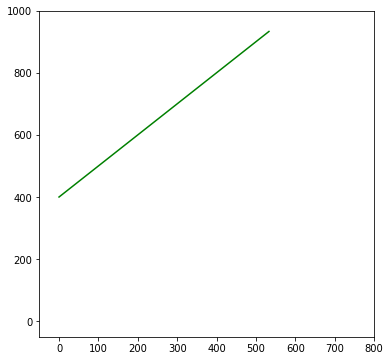

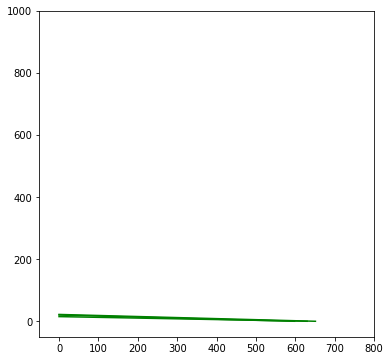

In [23]:
for sl in set(line_labels):
    fig = plt.figure(figsize=(6,6))
    plt.xlim(-50,800)
    plt.ylim(-50,1000)
    for i,label in enumerate(line_labels):
        if label == sl:
            x = points[i]
            plt.plot(x[[0,2]],x[[1,3]],'%s-'%(color_dict[label]))

----

In [40]:
(False + True + True+ True)%2

1

In [42]:
a  = 3*2 - 6*4 > 0

In [43]:
a

False